In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [5]:
properties = pd.read_table('properties_2016.csv', header=0, index_col=0, sep=',')

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Shape of `properties`

In [6]:
print(properties.shape)

(2985217, 57)


#### Percentage of NAs in each columns

In [7]:
na_percents = properties.isnull().sum()/properties.shape[0]
na_percents.sort_values()

rawcensustractandblock          0.003831
longitude                       0.003831
latitude                        0.003831
regionidcounty                  0.003831
fips                            0.003831
propertylandusetypeid           0.003831
assessmentyear                  0.003832
bedroomcnt                      0.003836
bathroomcnt                     0.003840
roomcnt                         0.003844
propertycountylandusecode       0.004113
regionidzip                     0.004683
taxamount                       0.010468
taxvaluedollarcnt               0.014254
structuretaxvaluedollarcnt      0.018418
calculatedfinishedsquarefeet    0.018613
yearbuilt                       0.020075
regionidcity                    0.021052
landtaxvaluedollarcnt           0.022689
censustractandblock             0.025166
fullbathcnt                     0.043183
calculatedbathnbr               0.043183
finishedsquarefeet12            0.092467
lotsizesquarefeet               0.092489
propertyzoningde

#### Dtype of each variable

In [8]:
properties.dtypes

airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64


In [65]:
def histgram_plot(series,
                  is_numeric=None,
                  na_ratio=-1,
                  return_dict=False):
    if is_numeric is None:
        raise ValueError('\'is_numeric\' must be specified.')
    if is_numeric:
        data = series.values
        data_plot = np.array(data[~np.isnan(data)])
    else:
        series_clean = series.loc[~series.isnull()]
        data_clean = series_clean.values
        le = LabelEncoder()
        data_plot = le.fit_transform(data_clean)
        x_raw = le.classes_
        x_encode = le.fit_transform(x_raw)
        encode_dict = {}
        for i in range(len(x_raw)):
            encode_dict[x_raw[i]] = x_encode[i]
    if len(np.unique(data_encoder) > 1):
        plt.hist(data_encoder,
                 bins=20)
        plt.title(series.name+' (NA Ratio:{0:.2f}%)'.format(na_ratio))
        plt.show()
    else:
        print("WARNING: Data only has a single value.")
    if return_dict:
        return encode_dict


## Histgrams for numerical varibles

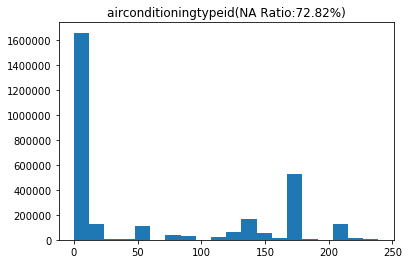

In [66]:
numeric_variables = properties.columns[properties.dtypes != 'object']
for var in ['airconditioningtypeid']:
    series = properties[var]
    na_ratio = series.isnull().sum()/series.shape[0]*100
    histgram_plot(series,is_numeric=True,na_ratio=na_ratio)

### `architecturalstyletypeid`

In [57]:
histgram_plot(properties['airconditioningtypeid'],
              is_numeric=True)

'propertycountylandusecode'

In [62]:
series.isnull().sum()/series.shape[0]

0.004112598849597868

In [67]:
len(np.unique(properties['airconditioningtypeid']))

2173705

parcelid
10754147    NaN
10759547    NaN
10843547    NaN
10859147    NaN
10879947    NaN
10898347    NaN
10933547    NaN
10940747    NaN
10954547    NaN
10976347    NaN
11073947    NaN
11114347    NaN
11116947    NaN
11142747    NaN
11193347    NaN
11215747    NaN
11229347    NaN
11287347    NaN
11288547    NaN
11324547    1.0
11391347    NaN
11395747    NaN
11404347    NaN
11405747    NaN
11417147    NaN
11457547    NaN
11488147    NaN
11520747    NaN
11524947    1.0
11544747    1.0
Name: airconditioningtypeid, dtype: float64